<a href="https://colab.research.google.com/github/sebinefrancis/Deep-Learning-Exercise/blob/Reuters_News_Multiclass_Classification/Reuters_News_Multiclass_Classification/Reuters_News_Single_Label_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Reuters dataset

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print('Training data size = ' + str(len(train_data)))
print('Test data size = ' + str(len(test_data)))
train_data[10]

Decoding newswires back to text

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#the index of words in news sample is offset by 3 from that of dictionary
#because 0,1,2 are reserved in news samples for padding, start, unknown
#so index 3 in news sample means 0 in dictionary, 4=1 and so on
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Encoding the data : Vectorize samples

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorize the labels : Here using one-hot encoding(Categorical encoding)

In [0]:
#naive approach
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

#built-in way to do this in Keras
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Building your network**

This topic-classification problem looks similar to the previous movie-review classification
problem: in both cases, you’re trying to classify short snippets of text. But there is
a new constraint here: the number of output classes has gone from 2 to 46. The
dimensionality of the output space is much larger.

In a stack of Dense layers like that you’ve been using, each layer can only access information
present in the output of the previous layer. If one layer drops some information
Listing 3.14 Encoding the data
Vectorized training data
Vectorized test data
Vectorized training labels
Vectorized test labels relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous
example, you used 16-dimensional intermediate layers, but a 16-dimensional space may
be too limited to learn to separate 46 different classes: such small layers may act as information
bottlenecks, permanently dropping relevant information.

For this reason you’ll use larger layers. Let’s go with 64 units.

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:



*   You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.
*   The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution
output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output something
as close as possible to the true labels.



In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

**Validating your approach**

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now, let’s train the network for 20 epochs.

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 158us/step - loss: 2.5739 - accuracy: 0.5117 - val_loss: 1.6914 - val_accuracy: 0.6400
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4018 - accuracy: 0.7027 - val_loss: 1.2932 - val_accuracy: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0463 - accuracy: 0.7765 - val_loss: 1.1267 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.8230 - accuracy: 0.8255 - val_loss: 1.0362 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.6558 - accuracy: 0.8608 - val_loss: 0.9771 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5192 - accuracy: 0.8930 - val_loss: 0.9301 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 121us/step - loss

And finally, let’s display its loss and accuracy curves

Plotting the training and validation loss

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


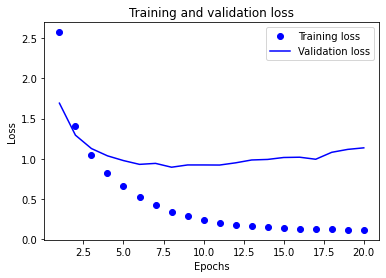

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

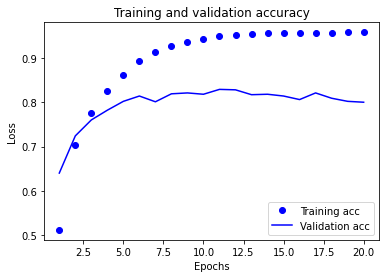

In [0]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 129us/step - loss: 2.4567 - accuracy: 0.5209 - val_loss: 1.6791 - val_accuracy: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.3834 - accuracy: 0.7085 - val_loss: 1.2723 - val_accuracy: 0.7080
Epoch 3/9
7982/7982 [==============================] - 1s 120us/step - loss: 1.0245 - accuracy: 0.7791 - val_loss: 1.1105 - val_accuracy: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.8030 - accuracy: 0.8317 - val_loss: 1.0170 - val_accuracy: 0.7950
Epoch 5/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.6351 - accuracy: 0.8702 - val_loss: 0.9513 - val_accuracy: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.5087 - accuracy: 0.8989 - val_loss: 0.8859 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.404

[0.9822282226406244, 0.7845057845115662]

In [0]:
results

[0.9671777897611433, 0.7898486256599426]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18744434550311664

**Generating predictions on new data**

In [0]:
predictions = model.predict(x_test)

Each entry in predictions is a vector of length 46:

In [0]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [0]:
np.sum(predictions[0])

1.0

The index of largest entry is the predicted class—the class with the highest probability:

In [0]:
np.argmax(predictions[0])

3

**A different way to handle the labels and the loss**

We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor, like this:

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used in listing 3.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy:

In [0]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

**The importance of having sufficiently large intermediate layers**

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=128,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.5819 - accuracy: 0.6649 - val_loss: 1.0988 - val_accuracy: 0.7460
Epoch 2/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.7835 - accuracy: 0.8242 - val_loss: 0.9628 - val_accuracy: 0.7890
Epoch 3/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.4747 - accuracy: 0.8980 - val_loss: 0.8931 - val_accuracy: 0.8150
Epoch 4/20
7982/7982 [==============================] - 2s 238us/step - loss: 0.3145 - accuracy: 0.9305 - val_loss: 0.8786 - val_accuracy: 0.8320
Epoch 5/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.2358 - accuracy: 0.9449 - val_loss: 0.9005 - val_accuracy: 0.8220
Epoch 6/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.1893 - accuracy: 0.9499 - val_loss: 0.9243 - val_accuracy: 0.8160
Epoch 7/20
7982/7982 [==============================] - 2s 228us/step - loss

[2.03955308773214, 0.7729296684265137]

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.